Train data shape: (1460, 81)


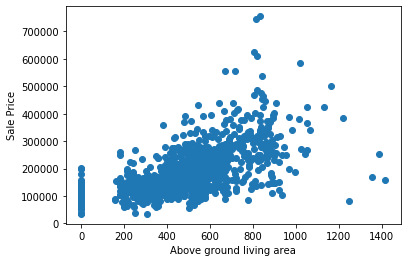

[[0.34727322 0.35100032]
 [0.00728832 0.06073101]
 [0.53615372 0.63172623]
 ...
 [1.07761115 1.03391416]
 [0.48852299 1.09005935]
 [0.42084081 0.9216238 ]]
(array([  58,  178,  178,  185,  349,  389,  440,  473,  496,  527,  581,
        591,  664,  664,  691,  769,  798,  803,  825,  898, 1046, 1061,
       1142, 1169, 1182, 1190, 1243, 1298, 1373]), array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0]))
SalePrice     84025.0
GarageArea      241.5
dtype: float64
(1433, 2)
(1387, 2)


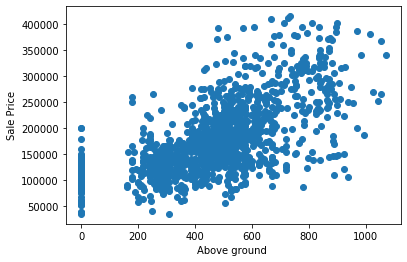

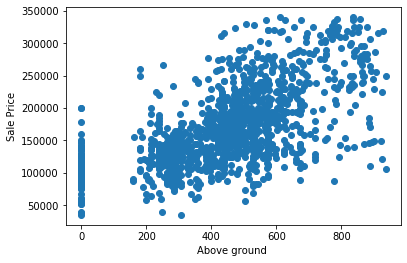

In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv('train.csv')
print ("Train data shape:", train.shape)
import matplotlib.pyplot as plt

var ='GarageArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
plt.scatter(x=train['GarageArea'], y=train['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Above ground living area')
plt.show()

from scipy import stats
z = np.abs(stats.zscore(data))
print(z)
threshold=3
print(np.where(z>3))


Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

#Removing outliers through Z score threshold
data = data[(z < 3).all(axis=1)]

#Removing outliers through IQR
data_df_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

print(data.shape)
print(data_df_out.shape)

var ='GarageArea'
plt.scatter(x=data['GarageArea'], y=data['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Above ground ')
plt.show()

plt.scatter(x=data_df_out['GarageArea'], y=data_df_out['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Above ground ')
plt.show()

In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
dataset = pd.read_csv('winequality-red.csv')

#Prints the total number of null values in the dataset
print('The total null values in the dataset are ',dataset.isnull().sum().sum())
print('-----------------------------------------------------------')

X=dataset.drop(['quality'],axis=1)
Y=dataset[['quality']]

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

#predicting the values
y_pred=regr.predict(X)

#Evaluating the model
print("Variance score: %.2f" % r2_score(Y,y_pred))
print("Mean squared error: %.2f" % mean_squared_error(Y,y_pred))
print('-----------------------------------------------------------')

#Calaculating the top 3 correlated variables
numeric_features = dataset.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print('Top 3 correlated variables to the target varialble quality is: ')
print(corr['quality'].sort_values(ascending=False)[:3],'\n')

The total null values in the dataset are  0
-----------------------------------------------------------
Variance score: 0.36
Mean squared error: 0.42
-----------------------------------------------------------
Top 3 correlated variables to the target varialble quality is: 
quality      1.000000
alcohol      0.476166
sulphates    0.251397
Name: quality, dtype: float64 

